In [1]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/content/drive/MyDrive/ibm"

In [2]:
%cd "/content/drive/MyDrive/ibm"

/content/drive/MyDrive/ibm


In [3]:
import pandas as pd
path= "/content/drive/MyDrive/ibm/Mall_Customers.csv"
df = pd.read_csv("/content/drive/MyDrive/ibm/Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


###Perform Below Visualizations.
● Univariate Analysis ● Bi - Variate Analysis ● Multi - Variate Analysis

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


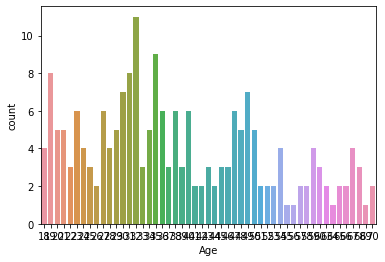

In [7]:
sns.countplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


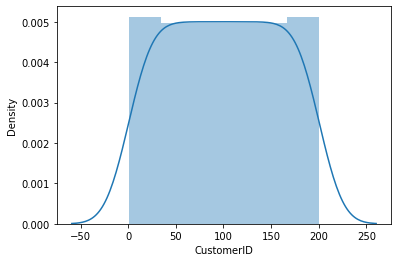

In [9]:
sns.distplot(df['CustomerID'])

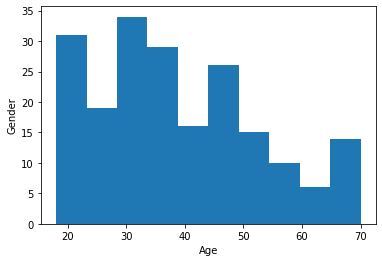

In [16]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.ylabel("Gender")
plt.show() 

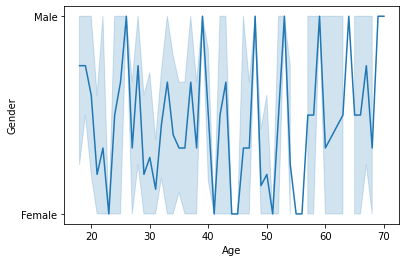

In [18]:
sns.lineplot(x=df['Age'], y=df['Gender'])

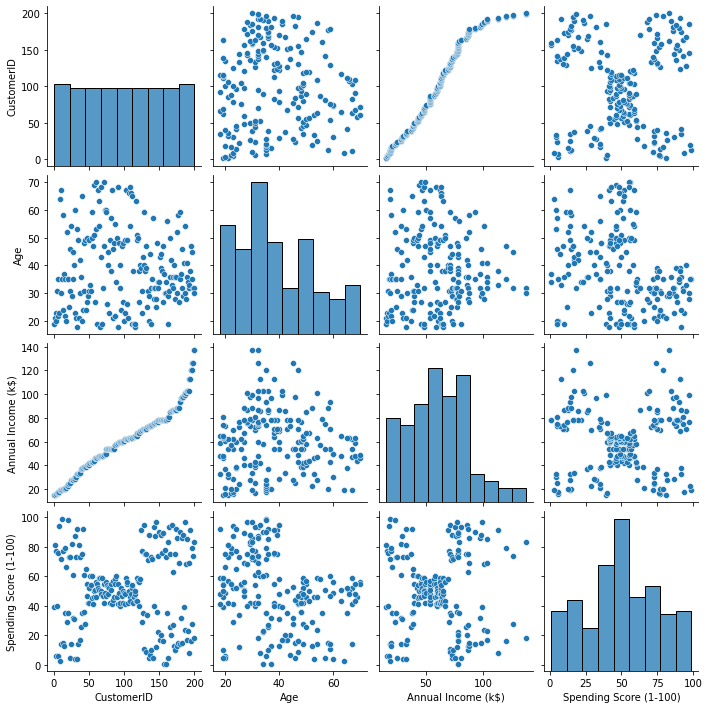

In [19]:
sns.pairplot(df, kind="scatter")

###Perform descriptive statistics on the dataset.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


####Handle the Missing values

In [22]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

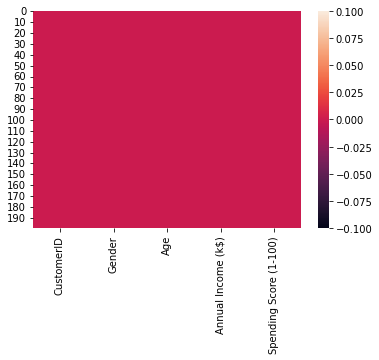

In [23]:
sns.heatmap(df.isnull())

##Find the outliers and replace the outliers

In [24]:
df.quantile(q=(0.25,0.75))

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


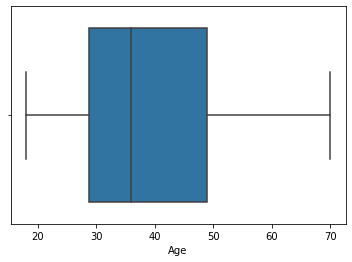

In [25]:
sns.boxplot(df['Age'])

In [29]:
import numpy as np

In [30]:
np.median(df['Age'])

36.0

In [31]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr
lower=q1-1.5*iqr
df['Age']=np.where(df['Age'] > upper, upper, df['Age'])
df['Age']=np.where(df['Age'] < lower, lower, df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


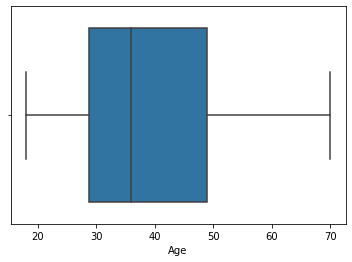

In [32]:
sns.boxplot(df['Age'])

## Check for Categorical columns and perform encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Age"] = le.fit_transform(df["Age"])

In [35]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,1,15,39
1,2,1,3,15,81
2,3,0,2,16,6
3,4,0,5,16,77
4,5,0,13,17,40
...,...,...,...,...,...
195,196,0,17,120,79
196,197,0,27,126,28
197,198,1,14,126,74
198,199,1,14,137,18


## Split the data into dependent and independent variables

In [40]:
x = df.drop(columns=['CustomerID', 'Gender', 'Age'], axis=1)

In [41]:
y = df['Gender']

In [42]:
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

## Scale the independent variables

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
x = pd.DataFrame(X, columns = x.columns)

In [46]:
x

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


##Perform any of the clustering algorithms

In [48]:
from sklearn.cluster import KMeans

In [51]:
km = KMeans(n_clusters=3, random_state=0)

In [54]:
df['Group or Cluster'] = km.fit_predict(df)

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Group or Cluster
0,1,1,1,15,39,0
1,2,1,3,15,81,0
2,3,0,2,16,6,0
3,4,0,5,16,77,0
4,5,0,13,17,40,0


In [56]:
df['Group or Cluster'].value_counts()

1    70
2    68
0    62
Name: Group or Cluster, dtype: int64

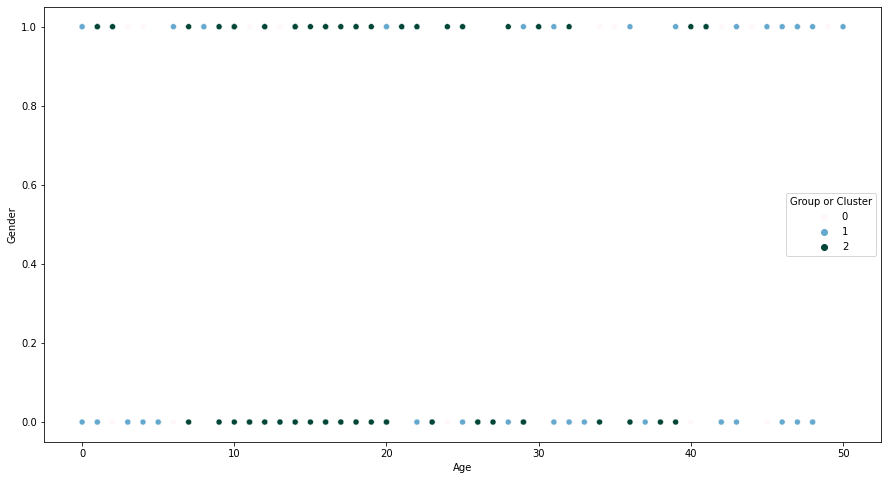

In [62]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=df['Age'],
                y=df['Gender'],
                hue=df['Group or Cluster'],
                palette='PuBuGn')
plt.show()